<a href="https://colab.research.google.com/github/Allpass032/Git-class---practice/blob/main/5_%EB%B6%84%EC%84%9D%EC%8B%A4%EC%8A%B5_4%ED%8C%80_%EC%9D%B4%EC%84%B1%EC%B2%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 EDA

---


In [ ]:
### 개발환경 세팅하기

# ▶ 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 33.9 MB/s eta 0:00:00


In [ ]:
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# 라이브러리 호출

import pandas as pd
import matplotlib.pyplot as plt
# import koreanize_matplotlib
import numpy as np
import seaborn as sns

# 모든 컬럼 확인을 위한 옵션
pd.set_option('display.max_columns',100)

In [ ]:
# 데이터 불러오기
df = pd.read_csv(r'/content/drive/MyDrive/코드잇_수업/3주차_내용/스프린트_미션_5/health_info.csv',encoding='cp949')

# 데이터 기본 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   기준년도         1000000 non-null  int64  
 1   가입자일련번호      1000000 non-null  int64  
 2   시도코드         1000000 non-null  int64  
 3   성별           1000000 non-null  int64  
 4   연령대코드(5세단위)  1000000 non-null  int64  
 5   신장(5cm단위)    1000000 non-null  int64  
 6   체중(5kg단위)    1000000 non-null  int64  
 7   허리둘레         999608 non-null   float64
 8   시력(좌)        999814 non-null   float64
 9   시력(우)        999815 non-null   float64
 10  청력(좌)        999885 non-null   float64
 11  청력(우)        999884 non-null   float64
 12  수축기혈압        994444 non-null   float64
 13  이완기혈압        994444 non-null   float64
 14  식전혈당(공복혈당)   994389 non-null   float64
 15  총콜레스테롤       345618 non-null   float64
 16  트리글리세라이드     345614 non-null   float64
 17  HDL콜레스테롤     345614 non-null   float64
 18  LDL

In [ ]:
df.shape

(1000000, 30)

In [ ]:
df.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석'],
      dtype='object')

In [ ]:
df.head(3)

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,1.0,1.0,127.0,73.0,84.0,NaN,NaN,NaN,NaN,14.8,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,1.0,1.0,127.0,75.0,85.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,1.0,1.0,135.0,81.0,105.0,NaN,NaN,NaN,NaN,13.0,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN


In [ ]:
# 데이터 원본에 대한 copy
h_df = df.copy()

# 기준년도, 가입자일련번호에 대해서 컬럼(열) 제거
h_df = h_df.drop(columns = ['기준년도', '가입자일련번호'])

# 데이터 결측치 확인
print(h_df.isnull().sum())

# 결측치 제거
drop_df = h_df.dropna(axis = 0)
f_df = drop_df.reset_index(drop=True)
print(f_df.shape) # 결측치 제거 후 행, 열 파악

시도코드                0
성별                  0
연령대코드(5세단위)         0
신장(5cm단위)           0
체중(5kg단위)           0
허리둘레              392
시력(좌)             186
시력(우)             185
청력(좌)             115
청력(우)             116
수축기혈압            5556
이완기혈압            5556
식전혈당(공복혈당)       5611
총콜레스테롤         654382
트리글리세라이드       654386
HDL콜레스테롤       654386
LDL콜레스테롤       660926
혈색소              5616
요단백             11054
혈청크레아티닌          5615
혈청지오티(AST)       5613
혈청지피티(ALT)       5613
감마지티피            5611
흡연상태               96
음주여부               73
구강검진수검여부            0
치아우식증유무        655671
치석             655670
dtype: int64
(106876, 28)


In [ ]:
# 시도코드 매핑
city ={
    11:'서울특별시', 26:'부산광역시', 27:'대구광역시', 28:'인천광역시',
    29:'광주광역시', 30:'대전광역시', 31:'울산광역시', 36:'세종특별자치시',
    41:'경기도', 42:'강원도', 43:'충청북도', 44:'충청남도', 45:'전라북도',
    46:'전라남도', 47:'경상북도', 48:'경상남도', 49:'제주특별자치도',
}

# 연령대 매핑
age = {
    5:'20~24세', 6:'25~29세', 7:'30~34세', 8:'35~39세',
    9:'40~44세', 10:'45~49세', 11:'50~54세', 12:'55~59세',
    13:'60~64세', 14:'65~69세', 15:'70~74세', 16:'75~79세',
    17:'80~84세', 18:'85세+',
}

# 성별 매핑
gender = {
    1:'남성',
    2:'여성'
}

# 흡연 매핑
smoke = {
    1 : '비흡연',
    2 : '과거_흡연',
    3 : '현재_흡연'
 }


# '나이', '성별', '흡연' 칼럼 추가
f_df['연령대코드(5세단위)'] = f_df['연령대코드(5세단위)'].map(age)
f_df['시도코드'] = f_df['시도코드'].map(city)
f_df['성별'] = f_df['성별'].map(gender)
f_df['흡연상태'] = f_df['흡연상태'].map(smoke)

# 매핑 후 컬럼명 재설정(흡연상태와 성별은 변경X)

f_df = f_df.rename(columns={
    '연령대코드(5세단위)': '연령대',
    '시도코드': '거주지',
})

In [ ]:
# 원하는 데이터 형태인지 확인
f_df.head(3)

,거주지,성별,연령대,신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,서울특별시,남성,60~64세,165,60,80.0,0.8,0.9,1.0,1.0,118.0,68.0,103.0,243.0,120.0,85.0,134.0,14.0,1.0,1.0,22.0,17.0,34.0,과거_흡연,1.0,1,0.0,0.0
1,강원도,남성,70~74세,175,75,80.0,0.8,0.7,1.0,1.0,179.0,94.0,109.0,216.0,140.0,47.0,141.0,14.7,1.0,1.0,22.0,16.0,31.0,과거_흡연,1.0,1,0.0,1.0
2,경기도,남성,30~34세,170,70,80.0,1.0,1.0,1.0,1.0,115.0,62.0,103.0,204.0,180.0,40.0,128.0,15.1,1.0,1.0,22.0,32.0,30.0,비흡연,1.0,1,0.0,1.0


In [ ]:
f_df.describe()

,신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,음주여부,구강검진수검여부,치아우식증유무,치석
count,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.000000,106876.0,106876.000000,106876.000000
mean,163.725065,65.808928,82.730176,0.944535,0.943881,1.048673,1.046764,122.915435,75.689481,101.319202,198.339038,122.400904,56.235104,117.816133,14.381343,1.113655,0.875187,27.379786,27.764989,36.214903,0.667596,1.0,0.167297,0.585192
std,9.587212,13.678887,10.011471,0.507009,0.504798,0.219192,0.214782,13.968025,9.808837,21.575291,40.486730,68.226683,14.344101,37.159332,1.514130,0.464652,0.287343,21.984770,29.091094,48.178615,0.471077,0.0,0.373242,0.584264
min,130.000000,30.000000,7.600000,0.100000,0.100000,1.000000,1.000000,66.000000,37.000000,47.000000,54.000000,8.000000,5.000000,1.000000,3.900000,1.000000,0.060000,3.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000
25%,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,113.000000,69.000000,90.000000,171.000000,73.000000,46.000000,92.000000,13.400000,1.000000,0.700000,20.000000,16.000000,16.000000,0.000000,1.0,0.000000,0.000000
50%,165.000000,65.000000,82.500000,0.900000,1.000000,1.000000,1.000000,122.000000,76.000000,97.000000,197.000000,105.000000,54.000000,117.000000,14.500000,1.000000,0.900000,24.000000,22.000000,24.000000,1.000000,1.0,0.000000,1.000000
75%,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,132.000000,82.000000,106.000000,224.000000,153.000000,65.000000,141.000000,15.500000,1.000000,1.000000,30.000000,32.000000,39.000000,1.000000,1.0,0.000000,1.000000
max,195.000000,135.000000,147.000000,9.900000,9.900000,3.000000,3.000000,260.000000,145.000000,497.000000,1823.000000,399.000000,801.000000,1788.000000,22.600000,6.000000,18.700000,3711.000000,4390.000000,2427.000000,1.000000,1.0,1.000000,2.000000


In [ ]:
f_df.describe().loc[['mean','min','50%','max']].T

,mean,min,50%,max
신장(5cm단위),163.725065,130.00,165.0,195.0
체중(5kg단위),65.808928,30.00,65.0,135.0
허리둘레,82.730176,7.60,82.5,147.0
시력(좌),0.944535,0.10,0.9,9.9
시력(우),0.943881,0.10,1.0,9.9
청력(좌),1.048673,1.00,1.0,3.0
청력(우),1.046764,1.00,1.0,3.0
수축기혈압,122.915435,66.00,122.0,260.0
이완기혈압,75.689481,37.00,76.0,145.0
식전혈당(공복혈당),101.319202,47.00,97.0,497.0


In [ ]:
f_df.columns

Index(['거주지', '성별', '연령대', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)',
       '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)',
       '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부', '치아우식증유무', '치석'],
      dtype='object')


---

## 배경   

---

혈색소가 특정 범위에 속하게 된다면 여러 질병을 의심하게 되는 수치가 되기도 한다.

남자와 여자에서 각각 혈색소 수치가 17g/dL 이상, 15g/dL 이상인 경우 적혈구 과다증을 의심할 수 있게 된다.

성인 남자와 성인 여자에서 각각 혈색소 수치가 13g/dL, 12g/dL 미만인 경우 철결핍성 빈혈에 해당된다.

혈색소 수치가 8g/dL 이하일 경우 단순 빈혈보다는 출혈을 뜻하므로 원인질환을 확인하기 위한 추가적인 검사가 필요

흡연자는 비흡연자보다 혈색소 수치가 높다.     
고지대에 살면 혈색소 수치가 증가할 수 있습니다.

고지대 : 제주도, 강원도, 경상북도    
저지대 : 인천광역시, 전라남도, 경기도    

높은 지대 선정 이유
<!-- 1. 평균적으로 높은 지대    
제주특별자치도:
제주도에는 한라산(1,947m)이 위치하고, 중산간 지역이 광범위하게 분포합니다. 이로 인해 제주도의 평균 지대가 상대적으로 높습니다.    
강원도:
태백산맥과 소백산맥이 지나가며, 높은 산들이 밀집해 있습니다. 설악산(1,708m), 태백산(1,567m) 등으로 인해 평균 고도가 높습니다.    
경상북도:
동쪽에 산악 지대가 많아 상대적으로 평균 지대가 높은 편입니다. 특히 경북 동부는 소백산맥과 태백산맥이 지나가는 지역입니다.
        
2. 평균적으로 낮은 지대    
인천광역시:
해안 지역과 섬들이 많아 지대가 낮은 편입니다. 대부분 해발 고도 20m 이하인 지역이 넓게 분포합니다.    
전라남도:
넓은 평야와 해안선 지역이 많으며, 해발 100m 이하의 저지대가 많이 분포합니다. 특히 곡창지대가 자리 잡은 평야가 주요 특징입니다.    
경기도:
서울을 포함해 대부분의 지역이 평지로 이루어져 있어 평균 지대가 낮습니다. 다만 일부 북부 지역은 약간의 산악 지대가 포함됩니다. -->


In [ ]:
# 지대에 대한 범주 설정을 위한 함수
def high_low_filter(x):
    high = ['제주도', '강원도', '경상북도']
    low = ['인천광역시', '전라남도', '경기도']

    place = x['거주지']
    if place in high:
        return '고지대'
    elif place in low:
        return ' 저지대'
    else:
        return '해당없음'

# 지대라는 컬럼 추가
f_df['지대'] = f_df.apply(high_low_filter, axis=1)

In [ ]:
f_df.head(1)

,거주지,성별,연령대,신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,지대
0,서울특별시,남성,60~64세,165,60,80.0,0.8,0.9,1.0,1.0,118.0,68.0,103.0,243.0,120.0,85.0,134.0,14.0,1.0,1.0,22.0,17.0,34.0,과거_흡연,1.0,1,0.0,0.0,해당없음


In [ ]:
# 각 연령대별 남녀 확인
pd.crosstab(f_df['성별'],f_df['연령대']).T

성별,남성,여성
연령대,,
20~24세,2638,0
25~29세,6316,0
30~34세,5735,0
35~39세,5190,0
40~44세,11627,9175
45~49세,6007,5427
50~54세,5654,5523
55~59세,4971,4730
60~64세,8704,9068


아래와 같은 결과를 통해 20 ~ 39세의 여성에 대한 데이터 존재하지 않음을 학인    
두 성별에 대해서 통일성을 위하여 20~39세의 데이터를 처리

In [ ]:
# 40대 이상의 남녀의 데이터 추출
u_df_filtered = f_df[~f_df['연령대'].isin(['20~24세','25~29세','30~34세','35~39세'])]
pd.crosstab(u_df_filtered['성별'],u_df_filtered['연령대']).T

성별,남성,여성
연령대,,
40~44세,11627,9175
45~49세,6007,5427
50~54세,5654,5523
55~59세,4971,4730
60~64세,8704,9068
65~69세,3139,3556
70~74세,1871,2076
75~79세,1300,1416
80~84세,1278,1281


<Figure size 600x600 with 0 Axes>

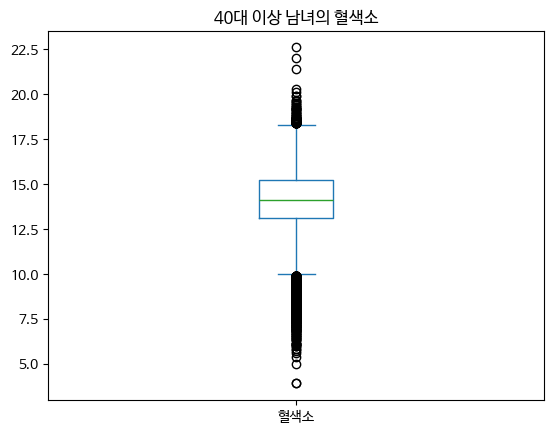

In [ ]:
# 40대 이상 남녀의 혈색소 boxplot

plt.figure(figsize=(6,6))
plt.rc('font', family='NanumBarunGothic')
u_df_filtered[['혈색소']].plot(kind='box')
plt.title('40대 이상 남녀의 혈색소')
plt.show()

In [ ]:
# 40대 이상의 중년 남녀의 평균 혈색소 이상치 제거

hemo_q3 = u_df_filtered['혈색소'].quantile(0.75)
hemo_q1 = u_df_filtered['혈색소'].quantile(0.25)

hemo_iqr = hemo_q3 - hemo_q1
u_df_remove_hemo = u_df_filtered[
    (u_df_filtered['혈색소'] > hemo_q1)&
    (u_df_filtered['혈색소'] < hemo_q3)
    ]

In [ ]:
pd.crosstab(u_df_remove_hemo['성별'],u_df_remove_hemo['연령대'])

연령대,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세+
성별,,,,,,,,,,
남성,4571,2619,2591,2371,4396,1726,1075,707,657,50
여성,4247,2536,3037,2785,5128,1867,973,656,459,29


In [ ]:

# '연령대'를 범주형으로 변환
u_df_remove_hemo.loc[:, '연령대'] = pd.Categorical(
    u_df_remove_hemo['연령대'],
    categories=['40~44세', '45~49세', '50~54세', '55~59세',
                '60~64세', '65~69세', '70~74세', '75~79세', '80~84세', '85세+'],
    ordered=True
)

u_df_remove_hemo = u_df_remove_hemo.sort_values('연령대')

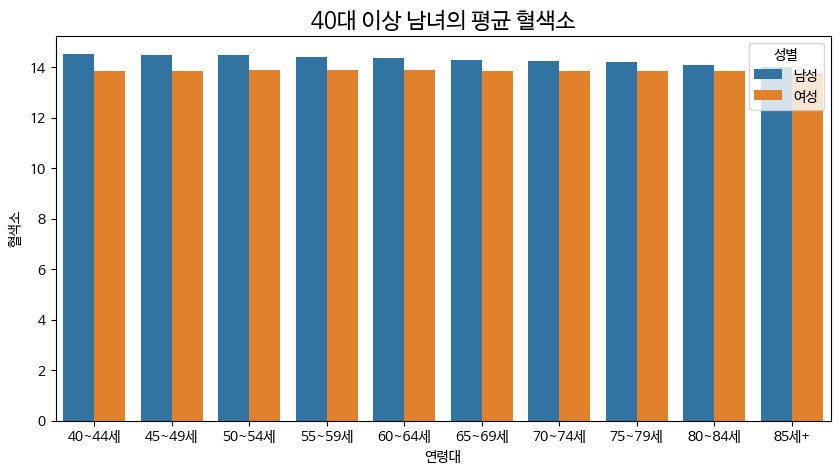

In [ ]:
# 이상치를 제거한 40대 이상의 남녀의 평균 혈색소를 비교하기 위한 barplot
# sns.set_theme(rc={'figure.figsize': (15, 6)}, style='white')

plt.figure(figsize=(10,5)) # 사이즈 조절
sns.barplot(data=u_df_remove_hemo, x='연령대', y='혈색소', errorbar=None, hue='성별')
plt.title("40대 이상 남녀의 평균 혈색소", fontsize=16)
plt.rc('font', family='NanumBarunGothic')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


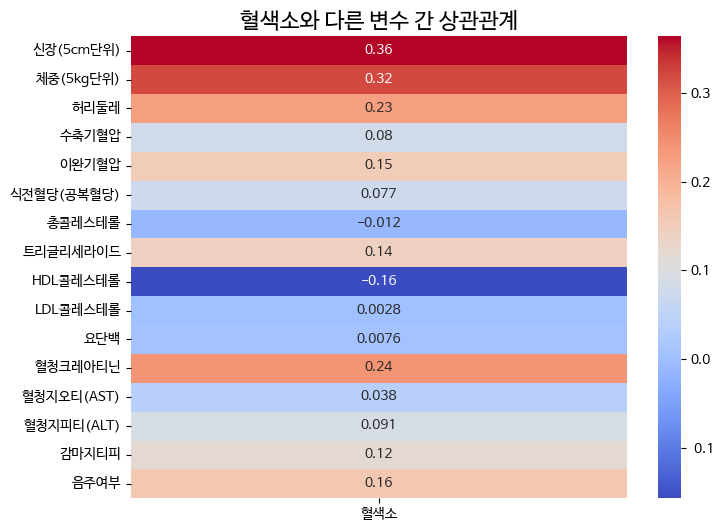

In [ ]:
# 제거할 칼럼 리스트 정의
columns_to_exclude = ["시력(좌)", "시력(우)", "청력(좌)", "청력(우)", "구강검진수검여부", "치아우식증유무", "치석"]

# 숫자형 데이터 선택 후 제외할 칼럼 제거
numeric_df = u_df_remove_hemo.select_dtypes(include=['float64', 'int64']).drop(columns=columns_to_exclude, errors='ignore')

# 혈색소와 다른 연속형 변수 간의 상관관계 계산
column_corr = numeric_df.corr()[["혈색소"]].drop("혈색소", axis=0)

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(column_corr, annot=True, cmap="coolwarm", cbar=True)
plt.title("혈색소와 다른 변수 간 상관관계",fontsize = 16)
plt.rc('font', family='NanumBarunGothic')
plt.show()


위 그래프를 통해서 혈색소에 대한 각 칼럼별 상관관계를 알 수 있다.    
 그 중 신장, 체중, 혈청크레아티닌, 허리 둘레 순으로 큰 영향을 주는 것을 확인 가능


---

## 가설 설정

---


- 1. 중년 남자와 여자의 평균 혈색소는 신장, 체중, 허리둘레, 혈청크레아티닌, 혈청지오티(AST), 혈청지피티(ALT)에 유의미한 영향을 받는다.

- 2. 철결핍성 빈혈에 해당되는 40대 이상의 여성의 평균 혈색소는 거주지가 고지대인지 저지대인지에 대해 차이가 있다.

- 3. 흡연 상태에 대한 40대 이상 남성의 평균 혈색소는 차이가 없다.

- 4. 적혈구 과다증에 해당되는 40대 이상 남성들의 평균 BMI는 음주여부에 대한 영향이 없다.

**위 칼럼들 중 가장 상관성이 있는 신장, 체중, 허리둘레, 혈청크레아티닌 그리고 추가로 혈청지오티와 혈청지피티에 대해서 혈색소에 대한 영향을 분석하기 위해 회귀분석을 사용**

In [ ]:
u_df_remove_hemo.columns

Index(['거주지', '성별', '연령대', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)',
       '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)',
       '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부', '치아우식증유무', '치석',
       '지대'],
      dtype='object')

### 회귀분석

In [ ]:
import statsmodels.formula.api as smf

# 종속변수 : 혈색소
# 독립변수 : 신장, 체중, 허리둘레, 혈청크레아티닌, 혈청지오티(AST), 혈청지피티(ALT)

u_df_reg = u_df_remove_hemo.copy()

u_df_reg['신장'] = u_df_reg['신장(5cm단위)']
u_df_reg['체중'] = u_df_reg['체중(5kg단위)']
u_df_reg['혈청지오티'] = u_df_reg['혈청지오티(AST)']
u_df_reg['혈청지피티'] = u_df_reg['혈청지피티(ALT)']

model = smf.ols(
    data=u_df_reg,
    formula='혈색소 ~ 신장 + 체중 + 허리둘레 + \
             혈청크레아티닌 + 혈청지오티 + 혈청지피티'
)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    혈색소   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     1371.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        03:59:04   Log-Likelihood:                -32657.
No. Observations:               42480   AIC:                         6.533e+04
Df Residuals:                   42473   BIC:                         6.539e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7001      0.067    159.761      0.000      10.569      10.831
신장             0.0167      0.000     40.222      0.000       0.016       0.018
체중             0.0025      0.000      5.091      0.000       0.002       0.003
허리둘레           0.0041      0.000      8.369      0.000       0.003       0.005
혈청크레아티닌        0.2763      0.012     22.133      0.000       0.252       0.301
혈청지오티         -0.0021      0.000     -8.584      0.000      -0.003      -0.002
혈청지피티          0.0025      0.000     13.258      0.000       0.002       0.003
==============================================================================
Omnibus:                     1874.253   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              777.436
Skew:                          -0.007   Prob(JB):                    1.52e-169
Kurtosis:                       2.337   Cond. No.                     5.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

위를 통해서 모든 독립 변수들이 종속변수에 통계적으로 유의미한 영향을 미친다고 할 수 있음. 단, R-squared의 값이 0.162이므로 종속변수의 변동성을 16.2%만 설명하기에 설명력이 낮은 모델이라고 할 수 있다.    
하지만 F-statistic의 값과 Prob (F-statistic)의 값을 통해 통계적으로 유의미하다는 것을 의미한다

가설 2번에 대해서

In [ ]:
# 철결핍성 빈혈 해당되는 40대 이상 남성과 여성에 대한 마스크
hemo_lack_men = (u_df_filtered['혈색소'] < 13) & (u_df_filtered['성별'] == '남성')
hemo_lack_women = (u_df_filtered['혈색소'] < 12) & (u_df_filtered['성별'] == '여성')

hemo_lack_df = u_df_filtered[hemo_lack_men|hemo_lack_women]
pd.crosstab(hemo_lack_df['성별'],hemo_lack_df['연령대'])

연령대,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세+
성별,,,,,,,,,,
남성,141,88,107,121,362,242,203,221,312,32
여성,1451,937,485,216,509,270,266,215,266,27


<ipython-input-28-b1e1a11025c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemo_lack_df['연령대'] = pd.Categorical(
<ipython-input-28-b1e1a11025c1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=hemo_lack_df, x='성별', y='연령대', palette=custom_palette)


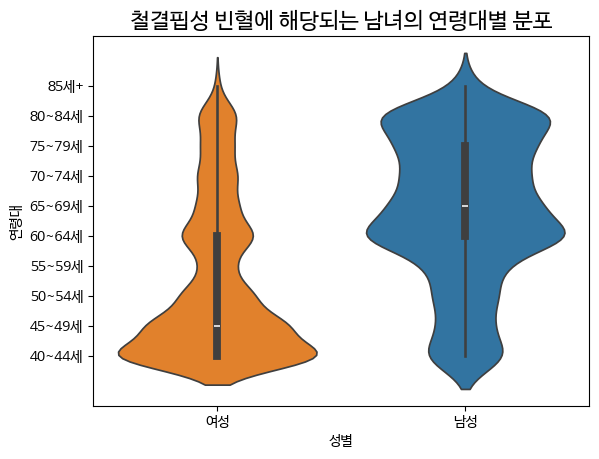

In [ ]:
# 연령대 데이터를 범주형으로 설정
hemo_lack_df['연령대'] = pd.Categorical(
    hemo_lack_df['연령대'],
    categories=['40~44세', '45~49세', '50~54세', '55~59세',
                '60~64세', '65~69세', '70~74세', '75~79세', '80~84세', '85세+'],
    ordered=True
)

# 색상 지정: 성별에 따라 다르게 설정
custom_palette = {'남성': '#1f77b4', '여성': '#ff7f0e'}  # 남: 파란색, 여: 주황색

# violinplot 그리기
sns.violinplot(data=hemo_lack_df, x='성별', y='연령대', palette=custom_palette)

# y축 반전
plt.gca().invert_yaxis()

# 그래프 제목 추가
plt.title("철결핍성 빈혈에 해당되는 남녀의 연령대별 분포",fontsize = 16)

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 그래프 표시
plt.show()

ttest(독립 표본 T-검정)    
귀무가설 : 고지대에 거주하는 40대 이상의 여성의 혈색소와 저지대에 거주하는 40대 이상의 여성의 평균 혈색소는 차이가 없다

In [ ]:
hemo_lack_df.head(3)

,거주지,성별,연령대,신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,지대
12,경기도,여성,70~74세,150,45,80.0,0.4,0.3,1.0,1.0,120.0,53.0,124.0,116.0,85.0,47.0,52.0,11.8,1.0,0.7,22.0,17.0,15.0,비흡연,0.0,1,0.0,1.0,저지대
26,경상남도,여성,45~49세,160,50,80.0,1.0,1.0,1.0,1.0,128.0,77.0,100.0,261.0,88.0,83.0,160.0,9.3,1.0,0.6,22.0,19.0,34.0,비흡연,1.0,1,1.0,1.0,해당없음
32,인천광역시,여성,60~64세,145,55,80.0,0.7,1.0,1.0,1.0,112.0,57.0,99.0,103.0,76.0,53.0,34.0,11.1,1.0,0.8,21.0,13.0,13.0,비흡연,0.0,1,1.0,2.0,저지대


In [ ]:
pd.crosstab(hemo_lack_df['지대'],hemo_lack_df['성별'])

성별,남성,여성
지대,,
저지대,543,1441
고지대,132,294
해당없음,1154,2907


이를 통해 저지대와 고지대 사는 여성들의 데이터가 있음을 확인

In [ ]:
# 데이터를 복사하여 사용
hemo_lack_df = hemo_lack_df.copy()

# '지대' 열의 값에서 공백 제거
hemo_lack_df.loc[:, '지대'] = hemo_lack_df['지대'].str.strip()

# NaN 제거
hemo_lack_df = hemo_lack_df.dropna(subset=['지대', '성별', '혈색소'])

In [ ]:
from scipy.stats import ttest_ind
data1 = hemo_lack_df[(hemo_lack_df['성별']== '여성')&(hemo_lack_df['지대'] == '고지대')]['혈색소']
data2 = hemo_lack_df[(hemo_lack_df['성별']== '여성')&(hemo_lack_df['지대'] == '저지대')]['혈색소']

print(data1.shape)  # 데이터1의 크기 확인
print(data2.shape)  # 데이터2의 크기 확인

s, p = ttest_ind(data1, data2, equal_var =False) # s : 검정통계량, p : pvalue
p

(294,)
(1441,)


0.47327164505999175

p 값이 0.05보다 크므로, **귀무가설을 기각하지 않는다**    
이는  귀무가설을 기각할 충분한 근거가 없다는 뜻으로. 즉, 저지대와 고지대에 사는 여성들의 평균 혈색소에 차이가 있다는 결론을 내릴 증거가 없다고 할 수 있다.


가설 3번에 대해서    
(흡연 상태에 대한 남성의 평균 혈색소는 차이가 없다.)

anova 분석

In [ ]:
u_df_filtered.head(3)

,거주지,성별,연령대,신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,지대
0,서울특별시,남성,60~64세,165,60,80.0,0.8,0.9,1.0,1.0,118.0,68.0,103.0,243.0,120.0,85.0,134.0,14.0,1.0,1.0,22.0,17.0,34.0,과거_흡연,1.0,1,0.0,0.0,해당없음
1,강원도,남성,70~74세,175,75,80.0,0.8,0.7,1.0,1.0,179.0,94.0,109.0,216.0,140.0,47.0,141.0,14.7,1.0,1.0,22.0,16.0,31.0,과거_흡연,1.0,1,0.0,1.0,고지대
3,경기도,여성,65~69세,155,50,80.0,1.0,0.5,2.0,1.0,130.0,62.0,162.0,195.0,259.0,42.0,101.0,12.9,1.0,0.7,22.0,19.0,13.0,비흡연,0.0,1,0.0,0.0,저지대


In [ ]:
pd.crosstab(u_df_filtered['흡연상태'],u_df_filtered['성별'])

성별,남성,여성
흡연상태,,
과거_흡연,16719,1267
비흡연,14138,39754
현재_흡연,13796,1323


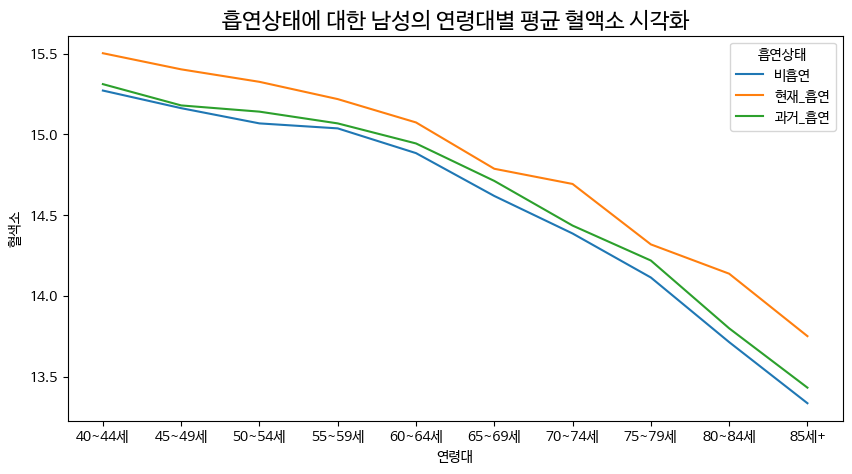

In [ ]:
# 남성에 대한 데이터 필터
men_hemo_df = u_df_filtered[u_df_filtered['성별'] == '남성']

# 범주형 데이터로 변환
men_hemo_df.loc[:, '연령대'] = pd.Categorical(
    men_hemo_df['연령대'],
    categories=['40~44세', '45~49세', '50~54세', '55~59세',
                '60~64세', '65~69세', '70~74세', '75~79세', '80~84세', '85세+'],
    ordered=True
)
men_hemo_df = men_hemo_df.sort_values('연령대')

# 그래프 크기 조걸
plt.figure(figsize=(10,5))

# 흡연상태에 대한 남성의 연령대별 평균 혈액소 시각화
sns.lineplot(data=men_hemo_df, x='연령대', y='혈색소', errorbar=None, hue='흡연상태') # hue는 seaborn에서 색상 구분을 통해 데이터를 그룹화하여 시각화할 때 사용하는 매개변수.

# 그래프 제목 추가
plt.title('흡연상태에 대한 남성의 연령대별 평균 혈액소 시각화',fontsize = 16)

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')

plt.show()

In [ ]:
from scipy.stats import f_oneway
# 각 그룹의 등분산 가정이 필요하지만 이번 파트에서는 따로 신경쓰지않고 검정 수행
# 귀무가설 : 흡연상태에 대한 40대 이상 남성들의 평균 혈색소는 차이가 없다

data1 = men_hemo_df[men_hemo_df['흡연상태'] == '비흡연']['혈색소']
data2 = men_hemo_df[men_hemo_df['흡연상태'] == '과거_흡연']['혈색소']
data3 = men_hemo_df[men_hemo_df['흡연상태'] == '현재_흡연']['혈색소']

f_stat, p_value = f_oneway(data1, data2, data3)
p_value

8.580793914293964e-153

p-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택 즉, 흡연 상태에 대해 남성들의 평균 혈색소는 차이가 있다

4번 가설에 대해서    
(적혈구 과다증에 해당되는 40대 이상 남성에 대해서 음주의 여부에 대한 평균 bmi의 차이는 없다)


In [ ]:
# 예시 데이터프레임 (신장, 몸무게, 음주 여부)

men_hemo_add_bmi_df = men_hemo_df.copy()

# 1. BMI 계산 후 소수점 1번째 자리까지 반올림
men_hemo_add_bmi_df['BMI'] = men_hemo_add_bmi_df['체중(5kg단위)'] / (men_hemo_add_bmi_df['신장(5cm단위)'] / 100) ** 2  # 신장을 미터로 변환 (cm -> m)
men_hemo_add_bmi_df['BMI'] = men_hemo_add_bmi_df['BMI'].round(1)

# 2. 음주 여부 변환
men_hemo_add_bmi_df['음주여부'] = men_hemo_add_bmi_df['음주여부'].map({1: '술마심', 0: '술안마심'})

# 젹혈구 과다증에 해당되는 남성의 데이터
hyper_men_df = men_hemo_add_bmi_df[men_hemo_add_bmi_df['혈색소'] >= 17]

# 결과 확인
hyper_men_df.head(3)


,거주지,성별,연령대,신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,지대,BMI
18907,경상남도,남성,40~44세,165,75,85.0,1.2,1.2,1.0,1.0,112.0,70.0,92.0,190.0,138.0,55.0,107.0,17.0,1.0,0.8,92.0,129.0,103.0,과거_흡연,술마심,1,0.0,1.0,해당없음,27.5
55434,경기도,남성,40~44세,165,80,92.0,0.9,0.8,1.0,1.0,133.0,86.0,101.0,244.0,320.0,44.0,136.0,17.8,1.0,1.2,28.0,36.0,73.0,과거_흡연,술마심,1,0.0,0.0,저지대,29.4
55256,경기도,남성,40~44세,175,90,92.0,1.0,0.7,1.0,1.0,153.0,90.0,90.0,224.0,142.0,45.0,150.0,18.0,1.0,1.0,22.0,20.0,17.0,현재_흡연,술마심,1,0.0,0.0,저지대,29.4


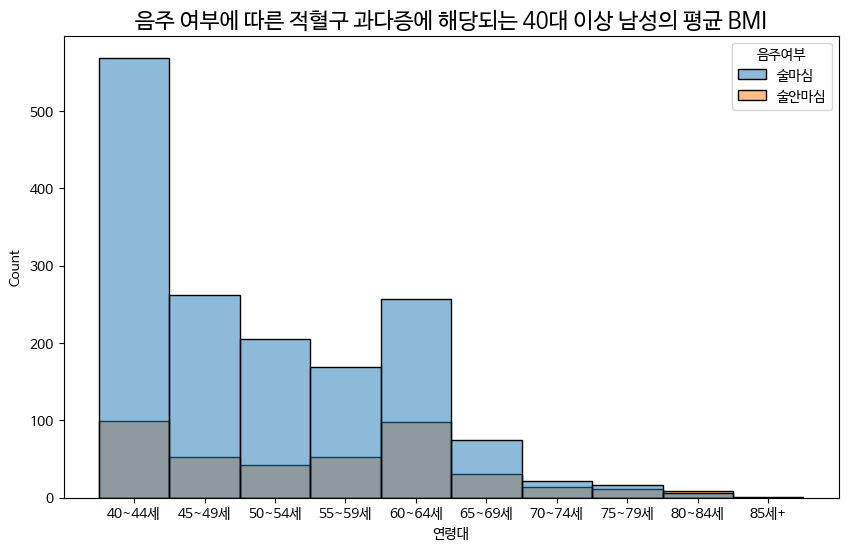

In [ ]:
# 그래프 크기 조절
plt.figure(figsize = (10,6))

# 연령대별 음주여부에 따른 남성의 평균 BMI 시각화
sns.histplot(data=hyper_men_df, x='연령대', bins=13, hue ='음주여부', multiple='layer')

# 그래프 제목 추가
plt.title('음주 여부에 따른 적혈구 과다증에 해당되는 40대 이상 남성의 평균 BMI',fontsize = 16)
plt.show()

ttest 진행     
귀무가설 : 음주여부가 적혈구 과다증에 해당되는 남자의 BMI에 영향을 주지 않는다.

In [ ]:
from scipy.stats import ttest_ind
data1 = hyper_men_df[hyper_men_df['음주여부']== '술마심']['BMI']
data2 = hyper_men_df[hyper_men_df['음주여부']== '술안마심']['BMI']

s, p = ttest_ind(data1, data2, equal_var =False) # s : 검정통계량, p : pvalue
p

0.06301618258735815

p-value가 0.05보다 크므로 귀무가설을 기각하지 못하고 음주여부가 적혈구 과다증에 해당되는 남성의 평균 BMI에 영향을 준다는 결론을 내릴 증거가 없다.     